Number of data points =  506
Learning rate =  0.001
Number of iterations =  55952
diff =  [8.8817842e-14]
b0 =  [[34.55379115]]
b1 =  [[-0.95004637]]


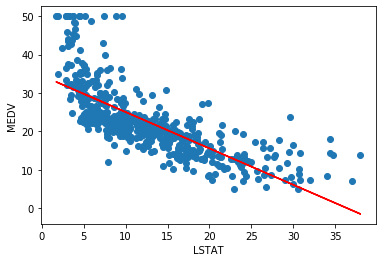

In [3]:
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

#- Loss function for simple linear regression
def loss_function_SLR(hypothesis, y):
    loss_function = np.square(hypothesis - y)
    return loss_function

#- Cost function for simple linear regression with n data points
def cost_function_SLR(loss_function, n):
    cost_function = 0.5 / n * sum(loss_function)
    return cost_function

#- Gradient descent for simple linear regression 
#- assuming the best fitting line is y = b + mx, 
#- where m is the slope and b is the intercept
def gradient_descent(raw_x, raw_y, 
                     learning_rate = 0.001, max_iterations = 100000,
                     convergence_criteria = 1.0e-13):
    #- Preprocess data
    n = np.size(raw_x)  # number of data points
    x = np.array(raw_x)
    y = np.array(raw_y)
    
    #- Assign initial b and m  
    b = np.zeros((x.shape[1], 1))
    m = np.zeros((x.shape[1], 1))

    #- Iterate to minimize the cost function
    #- Stop the iteration if max iterations reached or convergence criteria satisfied
    converged = False
    counter = 0
    x_transpose = x.transpose()
    cost_function = 0.0
    diff = 0.0
    while not converged:
        hypothesis = np.dot(x, m) + b

        gradient_b = 1.0/n * sum(hypothesis - y)
        gradient_m = 1.0/n * np.dot(x_transpose, (hypothesis - y))

        b = b - learning_rate * gradient_b
        m = m - learning_rate * gradient_m

#         print('iter = ', counter, ', cost_function = ', cost_function, ', diff = ', diff)

        #- Calculate cost function and the difference between two iterations
        hypothesis_updated = np.dot(x, m) + b
        loss_function = loss_function_SLR(hypothesis_updated, y)
        temp_cost_function = cost_function_SLR(loss_function, n)
        counter = counter + 1
        diff = abs(temp_cost_function - cost_function)
        
        if counter > 1 and cost_function <= temp_cost_function:
            converged = True             
        else:
            cost_function = temp_cost_function

        if counter >= max_iterations or diff <= convergence_criteria:
            converged = True
        
    else:
        print('Number of data points = ', n)
        print('Learning rate = ', learning_rate)
        print('Number of iterations = ', counter)
        print('diff = ', diff)
    
    #- retuern b and m
    return (b, m)


#- preprocess data
rawData = load_boston()
bostonDataset = pandas.DataFrame(rawData.data, columns=rawData.feature_names)
bostonDataset['MEDV'] = rawData.target

x = np.array(bostonDataset['LSTAT'])[:, np.newaxis]
y = np.array(bostonDataset['MEDV'])[:, np.newaxis]

#- Find b0 and b1 using Gradient descent
(b0, b1) = gradient_descent(x, y)
print('b0 = ', b0)
print('b1 = ', b1)


#- plot 

y_pred = b0 + b1 * x
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()